In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

Text(0.5, 1.0, 'Volatility Smirk')

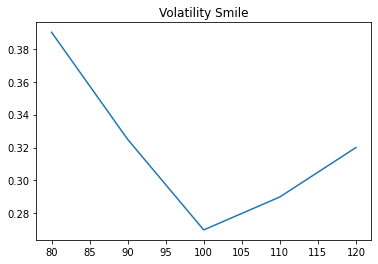

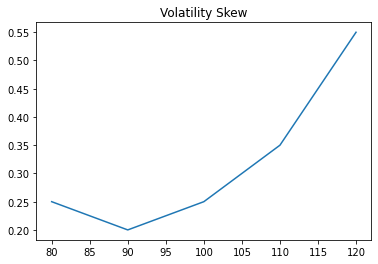

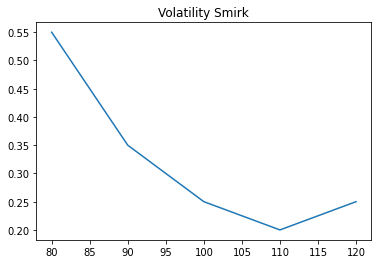

In [12]:
smile_df = pd.DataFrame({
    'implied_vol': [0.39, 0.325, 0.27, 0.29, 0.32],
    'strike': [80, 90, 100, 110, 120]
})

skew_df = pd.DataFrame({
    'implied_vol': [0.25, 0.20, 0.25, 0.35, 0.55],
    'strike': [80, 90, 100, 110, 120]
})

smirk_df = pd.DataFrame({
    'implied_vol': [0.55, 0.35, 0.25, 0.20, 0.25],
    'strike': [80, 90, 100, 110, 120]
})

# Produce volatility smiles
fig1, ax1 = plt.subplots()
ax1.plot(smile_df['strike'], smile_df['implied_vol'])
ax1.set_title('Volatility Smile')

# Produce volatility skew
fig2, ax2 = plt.subplots()
ax2.plot(skew_df['strike'], skew_df['implied_vol'])
ax2.set_title('Volatility Skew')

# Produce volatility skew
fig3, ax3 = plt.subplots()
ax3.plot(smirk_df['strike'], smirk_df['implied_vol'])
ax3.set_title('Volatility Smirk')

In [26]:

def der_f(f, x, epsilon=0.001):

    return (f(x + epsilon) - f(x)) / epsilon

def plot_f(f, N, x_min, x_max):

    x_vals = np.linspace(x_min, x_max, N)
    y_vals = []

    for i in x_vals:

        y_vals.append(f(i))

    fig = plt.figure(figsize = (10, 5))
    plt.plot(x_vals, y_vals)

def NewtonRaphson(market_price,
                  S,
                  K,
                  T,
                  r=0,
                  x0=1, cvg_e=.0001, x_min = -5, x_max = 5, N=1000):

    exitCondition = False
    x = x0
    iteration_num = 0

    def f(sigma):
    
        """
        - S: spot price
        - K: strike price
        - T: time to maturity
        - r: interest rate
        - sigma: volatility of underlying asset
        """
    
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
        call = (S * ss.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * ss.norm.cdf(d2, 0.0, 1.0))
    
        return call - market_price
  
    while not exitCondition:

        # Increment iteration number
        iteration_num = iteration_num + 1

        # Calculate the new x value
        x = x - f(x) / der_f(f, x)

        # Exit condition if we are getting away from the zero 
        if abs(f(x)) < cvg_e or iteration_num > 100:
            print('        Newton-Raphson algorithm        ')
            print('        ------------------------        ')
            print(f'- Zero of the function f: {x}')
            print(f'- Number of iteration: {iteration_num}')
            print(f'- Tolerance: {cvg_e}')
            print('        ------------------------        ')
            return x

In [14]:
# BS market price calculator

def BS_call_price(S, K, T, r, sigma):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    call = (S * ss.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * ss.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [22]:
rate = 0

#### Find market prices for smile values
smile_spot = 100
smile_strikes = [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
smile_implied_vols = [12.40, 9.59 ,8.28, 7.40, 6.86, 6.58 ,6.52 ,6.49 ,6.47, 6.46]
smile_maturity = 1

smile_prices = []
smile_prices.append(BS_call_price(smile_spot, 
                                  smile_strikes[0],
                                  smile_maturity,
                                  rate,
                                  smile_implied_vols[0]))
smile_prices.append(BS_call_price(smile_spot, 
                                  smile_strikes[1],
                                  smile_maturity,
                                  rate,
                                  smile_implied_vols[1]))
smile_prices.append(BS_call_price(smile_spot, 
                                  smile_strikes[2],
                                  smile_maturity,
                                  rate,
                                  smile_implied_vols[2]))
smile_prices.append(BS_call_price(smile_spot, 
                                  smile_strikes[3],
                                  smile_maturity,
                                  rate,
                                  smile_implied_vols[3]))
smile_prices.append(BS_call_price(smile_spot, 
                                  smile_strikes[4],
                                  smile_maturity,
                                  rate,
                                  smile_implied_vols[4]))

smile_prices

[99.99999994496697,
 99.99984061320758,
 99.9965794553579,
 99.97865681245163,
 99.93994448044461]

In [21]:
rate = 0

#### Find market prices for smile values
skew_spot = 100
skew_strikes = [80, 90, 100, 110, 120]
skew_implied_vols = [0.25, 0.20, 0.25, 0.35, 0.55]
skew_maturity = 1

skew_prices = []
skew_prices.append(BS_call_price(skew_spot, 
                                  skew_strikes[0],
                                  skew_maturity,
                                  rate,
                                  skew_implied_vols[0]))
skew_prices.append(BS_call_price(skew_spot, 
                                  skew_strikes[1],
                                  skew_maturity,
                                  rate,
                                  skew_implied_vols[1]))
skew_prices.append(BS_call_price(skew_spot, 
                                  skew_strikes[2],
                                  skew_maturity,
                                  rate,
                                  skew_implied_vols[2]))
skew_prices.append(BS_call_price(skew_spot, 
                                  skew_strikes[3],
                                  skew_maturity,
                                  rate,
                                  skew_implied_vols[3]))
skew_prices.append(BS_call_price(skew_spot, 
                                  skew_strikes[4],
                                  skew_maturity,
                                  rate,
                                  skew_implied_vols[4]))

skew_prices

[22.265590130531834,
 13.589108116054796,
 9.94764496602258,
 10.118192116976672,
 15.096207835754342]

In [39]:
rate = 0

#### Find market prices for smile values
smirk_spot = 100
smirk_strikes = [80, 90, 100, 110, 120]
smirk_implied_vol = [0.55, 0.35, 0.25, 0.20, 0.25]
smirk_maturity = 1

smirk_prices = []
smirk_prices.append(BS_call_price(smirk_spot, 
                                  smirk_strikes[0],
                                  smirk_maturity,
                                  rate,
                                  smirk_implied_vol[0]))
smirk_prices.append(BS_call_price(smirk_spot, 
                                  smirk_strikes[1],
                                  smirk_maturity,
                                  rate,
                                  smirk_implied_vol[1]))
smirk_prices.append(BS_call_price(smirk_spot, 
                                  smirk_strikes[2],
                                  smirk_maturity,
                                  rate,
                                  smirk_implied_vol[2]))
smirk_prices.append(BS_call_price(smirk_spot, 
                                  smirk_strikes[3],
                                  smirk_maturity,
                                  rate,
                                  smirk_implied_vol[3]))
smirk_prices.append(BS_call_price(smirk_spot, 
                                  smirk_strikes[4],
                                  smirk_maturity,
                                  rate,
                                  smirk_implied_vol[4]))

smirk_prices

[31.03743847867434,
 18.784217716370165,
 9.94764496602258,
 4.292010941409885,
 3.70588308589387]

In [27]:
strikes = [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
call_prices = [12.40, 9.59 ,8.28, 7.40, 6.86, 6.58 ,6.52 ,6.49 ,6.47, 6.46]
implied_vols = []

for i in range(len(strikes)):
    
    implied_vols.append(NewtonRaphson(call_prices[i], S=100, K=strikes[i], T=1))

        Newton-Raphson algorithm        
        ------------------------        
- Zero of the function f: 0.2499663565778121
- Number of iteration: 3
- Tolerance: 0.0001
        ------------------------        
        Newton-Raphson algorithm        
        ------------------------        
- Zero of the function f: 0.1900752722558835
- Number of iteration: 3
- Tolerance: 0.0001
        ------------------------        
        Newton-Raphson algorithm        
        ------------------------        
- Zero of the function f: 0.17003131063821617
- Number of iteration: 3
- Tolerance: 0.0001
        ------------------------        
        Newton-Raphson algorithm        
        ------------------------        
- Zero of the function f: 0.16095617405528456
- Number of iteration: 3
- Tolerance: 0.0001
        ------------------------        
        Newton-Raphson algorithm        
        ------------------------        
- Zero of the function f: 0.16007904395933434
- Number of iterat